


 * *L'objectif de ce projet est de détecter des causes au churn ainsi que mettre en place un score de probabilité de churn par client.*



* *Prédire les clients susceptibles de résilier à l'aide d'un modèle prédictif*.

# L'analyse exploratoire des données, Feature Engineering, Modelling et deployment

---

1. Import packages
2. Load data
3. Explore data
4. Feature engineering
5. Modelling
6. Deployment 

---

## 1. Import packages

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

!pip install pycaret
import pycaret
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

---
## 2. Load data

In [2]:
df = pd.read_csv('./clean_data_after_eda1.csv')
df.shape

(14605, 54)

In [3]:
df.head(3)

,Unnamed: 0,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,...,mean_3m_price_p1_var,mean_3m_price_p2_var,mean_3m_price_p3_var,mean_3m_price_p1_fix,mean_3m_price_p2_fix,mean_3m_price_p3_fix,mean_3m_price_p1,mean_3m_price_p2,mean_3m_price_p3,churn
0,0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,...,0.131756,0.092638,0.036909,42.497907,12.218665,8.145777,42.629663,12.311304,8.182687,1
1,1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,...,0.147600,0.000000,0.000000,44.444710,0.000000,0.000000,44.592310,0.000000,0.000000,0
2,2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,...,0.167798,0.088409,0.000000,44.444710,0.000000,0.000000,44.612508,0.088409,0.000000,0


**Description des données:** \

●	id = identifiant client\
●	activity_new = catégorie d'activité de l'entreprise\
●	channel_sales = code du canal de vente\
●	cons_12m = consommation d'électricité des 12 derniers mois\
●	cons_gas_12m = gas consumption of the past 12 months\
●	cons_last_month =consommation de gaz des 12 derniers mois\
●	date_activ = date d'activation du contrat\
●	date_end = date enregistrée de fin de contrat\
●	date_modif_prod = date de la dernière modification du produit\
●	date_renewal = date du prochain renouvellement de contrat\
●	forecast_cons_12m = consommation d'électricité prévue pour les 12 prochains mois\
●	forecast_cons_year = consommation d'électricité prévue pour l'année  suivante\
●	forecast_discount_energy = valeur prévue de la remise actuelle\
●	forecast_meter_rent_12m = facture de location prévisionnelle pour les 2 prochains mois\
●	forecast_price_energy_off_peak = prix prévisionnel de l'énergie pour la 1ère période (off peak)\
●	forecast_price_energy_peak = prix de l'énergie prévu pour la 2ème période (peak)\
●	forecast_price_pow_off_peak = prix de l'électricité prévu pour la 1ère période (off peak)\
●	has_gas = indiqué si le client est aussi client gaz\
●	imp_cons = consommation actuelle payée\
●	margin_gross_pow_ele = marge brute sur souscription d'électricité\
●	margin_net_pow_ele = marge nette sur souscription d'électricité\
●	nb_prod_act = nombre de produits et services actifs\
●	net_margin = marge nette totale\
●	num_years_antig = ancienneté du client (en nombre d'années)\
●	origin_up = code de la campagne d'électricité à laquelle le client s'est initialement abonné\
●	pow_max = puissance souscrite\
●	price_date = date de référence\
●	price_off_peak_var = prix de l'énergie pour la 1ère période (off peak)\
●	price_peak_var = prix de l'énergie pour la 2ème période (peak)\
●	price_mid_peak_var = prix de l'énergie pour la 3ème période (mid peak)\
●	price_off_peak_fix = prix de l'électricité pour la 1ère période (off peak)\
●	price_peak_fix = prix de l'électricité pour la 2ème période (peak)\
●	price_mid_peak_fix = prix de l'électricité pour la 3ème période (mid peak)\
●	churn =le client a-t-il désabonné au cours des 3 prochains mois




---

## 3. Explore Data

Il est utile de comprendre d'abord les données que vous traitez ainsi que les types de données de chaque colonne. 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14605 entries, 0 to 14604
Data columns (total 54 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      14605 non-null  int64  
 1   id                              14605 non-null  object 
 2   channel_sales                   14605 non-null  object 
 3   cons_12m                        14605 non-null  int64  
 4   cons_gas_12m                    14605 non-null  int64  
 5   cons_last_month                 14605 non-null  int64  
 6   date_activ                      14605 non-null  object 
 7   date_end                        14605 non-null  object 
 8   date_modif_prod                 14605 non-null  object 
 9   date_renewal                    14605 non-null  object 
 10  forecast_cons_12m               14605 non-null  float64
 11  forecast_cons_year              14605 non-null  int64  
 12  forecast_discount_energy        

Les colonnes liées à la date et à l'heure ne sont pas actuellement au format date et heure. 

In [5]:
df["date_activ"] = pd.to_datetime(df["date_activ"], format='%Y-%m-%d')
df["date_end"] = pd.to_datetime(df["date_end"], format='%Y-%m-%d')
df["date_modif_prod"] = pd.to_datetime(df["date_modif_prod"], format='%Y-%m-%d')
df["date_renewal"] = pd.to_datetime(df["date_renewal"], format='%Y-%m-%d')

In [6]:
df.describe()

,Unnamed: 0,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,...,mean_3m_price_p1_var,mean_3m_price_p2_var,mean_3m_price_p3_var,mean_3m_price_p1_fix,mean_3m_price_p2_fix,mean_3m_price_p3_fix,mean_3m_price_p1,mean_3m_price_p2,mean_3m_price_p3,churn
count,14605.000000,1.460500e+04,1.460500e+04,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000,...,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000
mean,7302.000000,1.592303e+05,2.809108e+04,16091.371448,1868.638618,1399.858747,0.966450,63.090448,0.137282,0.050488,...,0.139312,0.051310,0.028568,43.058161,9.483665,6.115566,43.197473,9.534975,6.144134,0.097159
std,4216.244676,5.734836e+05,1.629786e+05,64366.262314,2387.651549,3247.876793,5.108355,66.166636,0.024623,0.049037,...,0.024318,0.049501,0.036376,4.668200,12.139506,7.830408,4.683855,12.179014,7.866460,0.296184
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3651.000000,5.674000e+03,0.000000e+00,0.000000,494.980000,0.000000,0.000000,16.180000,0.116340,0.000000,...,0.119405,0.000000,0.000000,40.728885,0.000000,0.000000,40.848595,0.000000,0.000000,0.000000
50%,7302.000000,1.411600e+04,0.000000e+00,793.000000,1112.610000,314.000000,0.000000,18.800000,0.143166,0.084138,...,0.144757,0.084305,0.000000,44.355820,0.000000,0.000000,44.502379,0.084305,0.000000,0.000000
75%,10953.000000,4.076400e+04,0.000000e+00,3383.000000,2402.270000,1746.000000,0.000000,131.030000,0.146348,0.098837,...,0.147983,0.100491,0.073719,44.444710,24.437330,16.291555,44.592310,24.537821,16.365180,0.000000
max,14604.000000,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,...,0.276238,0.196029,0.103502,59.444710,36.490689,17.291555,59.720948,36.610036,17.382386,1.000000


Vérifier s'il y a des valeurs manquantes.

In [7]:
df.isnull().sum()

Unnamed: 0                        0
id                                0
channel_sales                     0
cons_12m                          0
cons_gas_12m                      0
cons_last_month                   0
date_activ                        0
date_end                          0
date_modif_prod                   0
date_renewal                      0
forecast_cons_12m                 0
forecast_cons_year                0
forecast_discount_energy          0
forecast_meter_rent_12m           0
forecast_price_energy_off_peak    0
forecast_price_energy_peak        0
forecast_price_pow_off_peak       0
has_gas                           0
imp_cons                          0
margin_gross_pow_ele              0
margin_net_pow_ele                0
nb_prod_act                       0
net_margin                        0
num_years_antig                   0
origin_up                         0
pow_max                           0
mean_year_price_p1_var            0
mean_year_price_p2_var      

In [8]:
def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"):
    """
    Plot stacked bars with annotations
    """
    ax = dataframe.plot(
        kind="bar",
        stacked=True,
        figsize=size_,
        rot=rot_,
        title=title_,
        color=['blue', 'orange']
    )

    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(["Retention", "Churn"], loc=legend_)
    # Labels
    plt.ylabel("Company base (%)")
    plt.show()

def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """

    # Iterate over the plotted rectanges/bars
    for p in ax.patches:
        
        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )

**3_1 Churn**

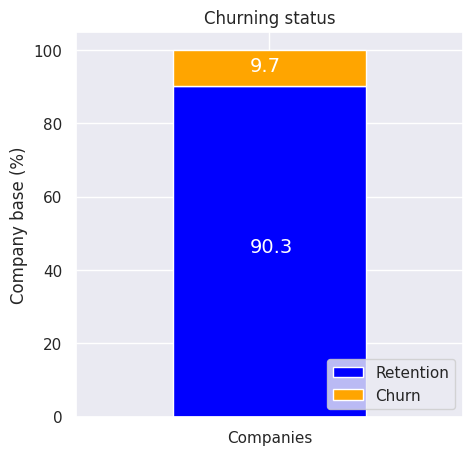

In [9]:
churn = df[['id', 'churn']]
churn.columns = ['Companies', 'churn']
churn_total = churn.groupby(churn['churn']).count()
churn_percentage = churn_total / churn_total.sum() * 100

plot_stacked_bars(churn_percentage.transpose(), "Churning status", (5, 5),legend_="lower right")

Environ 10% du total des clients ont churné.

**3_2 Sales channel**

In [10]:
channel = df[['id', 'channel_sales', 'churn']]
channel = channel.groupby([channel['channel_sales'], channel['churn']])['id'].count().unstack(level=1).fillna(0)
channel_churn = (channel.div(channel.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)

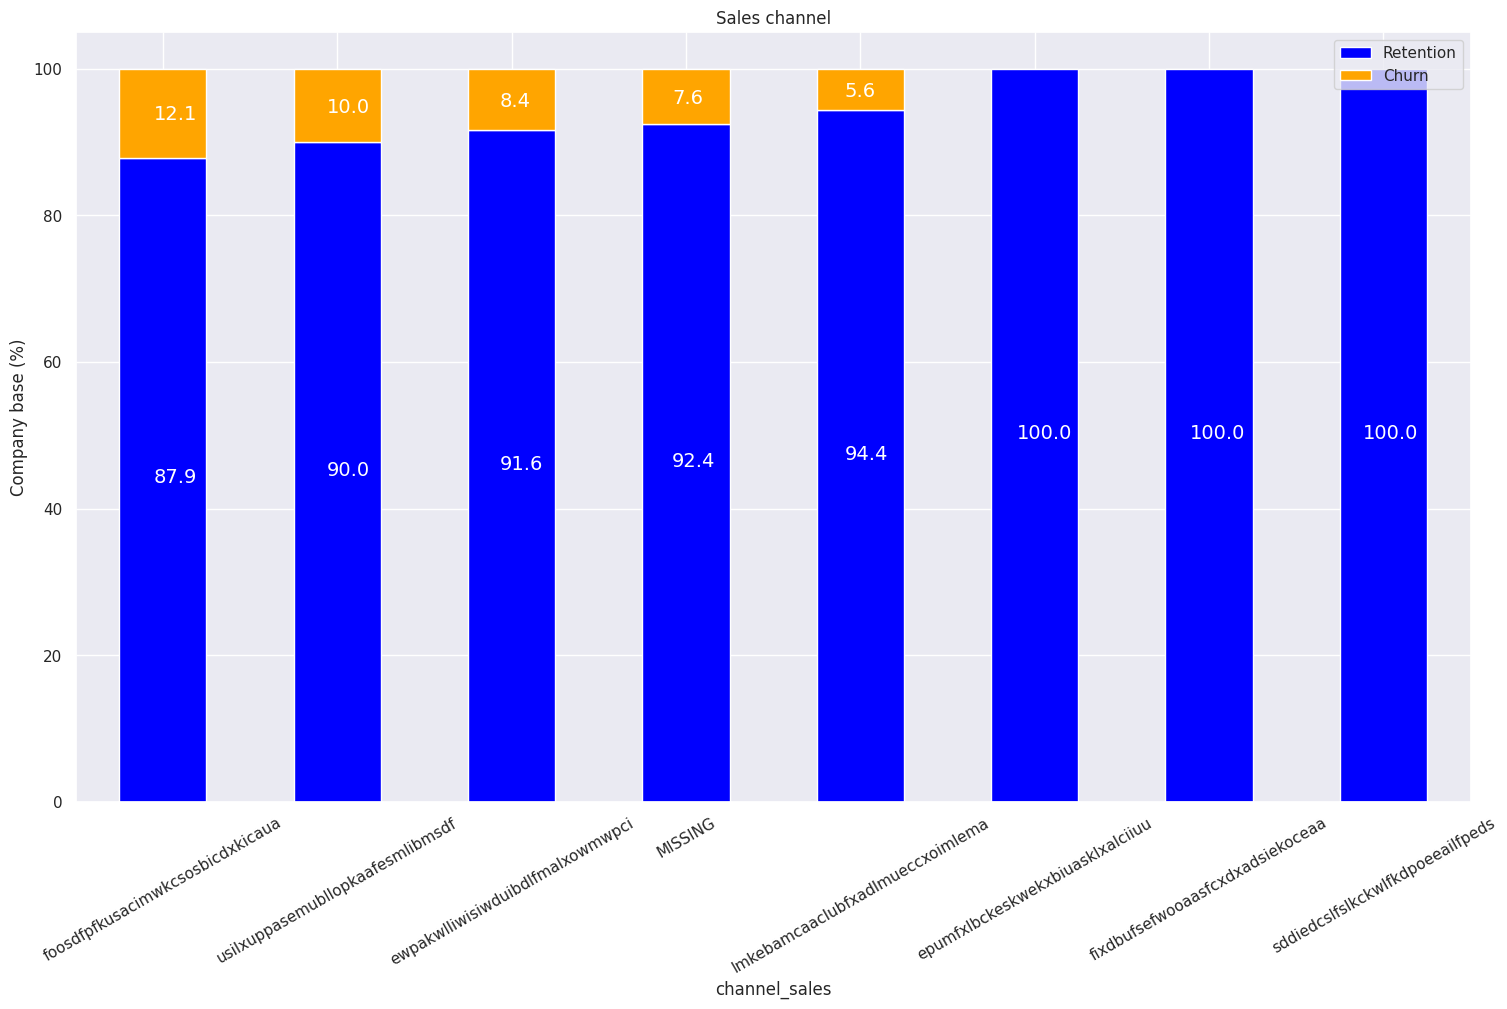

In [11]:
plot_stacked_bars(channel_churn, 'Sales channel', rot_=30)

Les clients qui tournent sont répartis sur 5 valeurs différentes pour `channel_sales`. De plus, la valeur de "MISSING" a un taux de désabonnement de 7,6 %. 

**3_3 Type de Contrat**

In [12]:
contract_type = df[['id', 'has_gas', 'churn']]
contract = contract_type.groupby([contract_type['churn'],contract_type['has_gas']])['id'].count().unstack(level=0)
contract_percentage = (contract.div(contract.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)

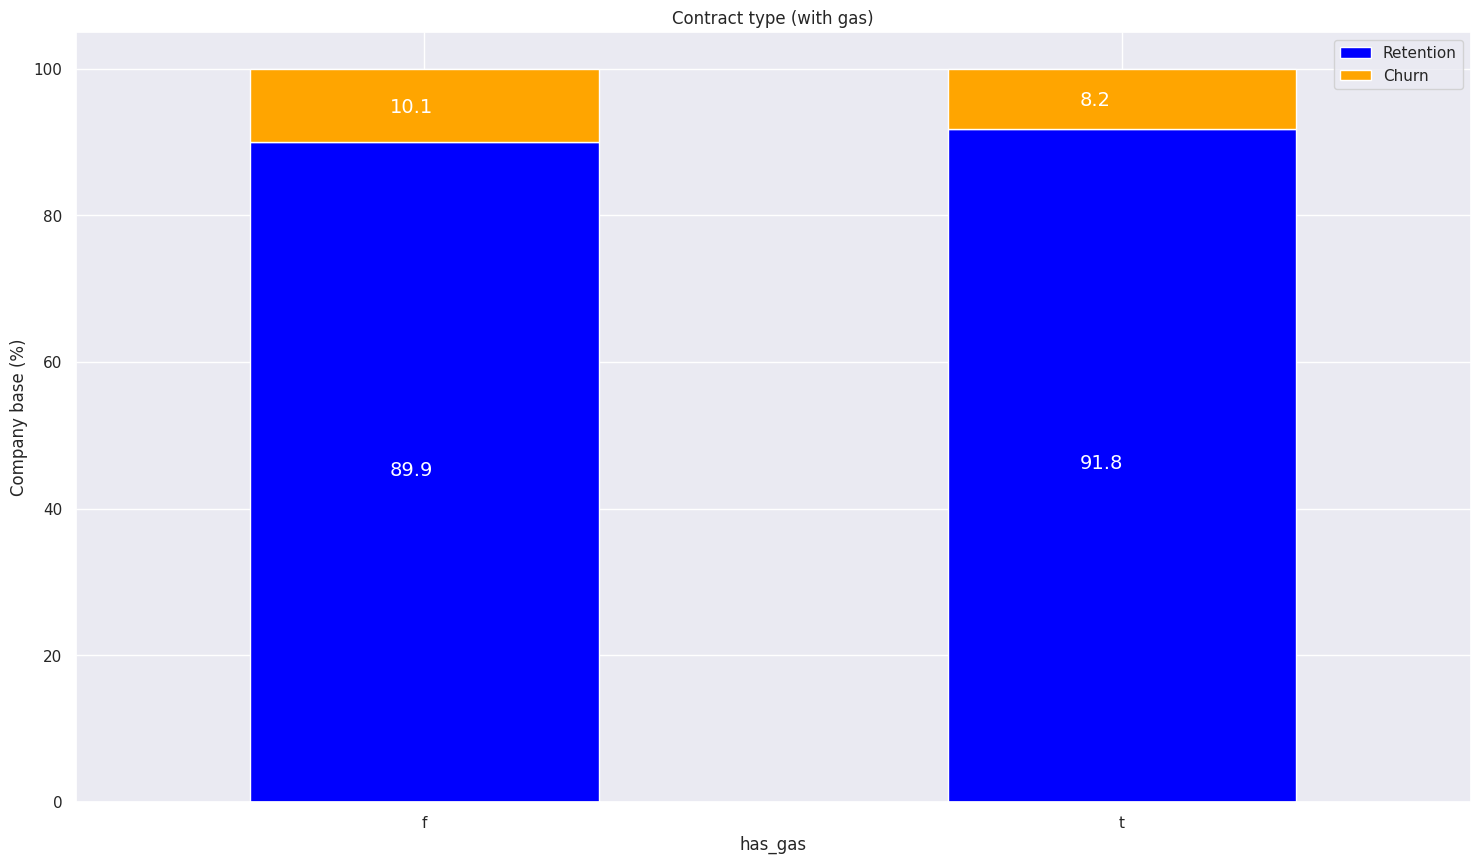

In [13]:
plot_stacked_bars(contract_percentage, 'Contract type (with gas)')

---

## 4. Feature engineering

### Tenure

Depuis combien de temps une entreprise est cliente de PowerCo.

In [14]:
df['tenure'] = ((df['date_end'] - df['date_activ'])/ np.timedelta64(1, 'Y')).astype(int)

In [15]:
df.groupby(['tenure']).agg({'churn': 'mean'}).sort_values(by='churn', ascending=False)

,churn
tenure,
3,0.143836
2,0.133080
4,0.125756
13,0.095238
5,0.085425
12,0.083333
6,0.080713
7,0.073394
11,0.063584


Les entreprises qui ne sont clientes que depuis 4 mois ou moins sont beaucoup plus susceptibles de se désabonner que les entreprises qui sont clientes depuis plus longtemps. Fait intéressant, la différence entre 4 et 5 mois est d'environ 4 %, ce qui représente une augmentation significative de la probabilité qu'un client se détourne par rapport aux autres différences entre les valeurs d'ancienneté ordonnées. Cela révèle peut-être qu'amener un client à plus de 4 mois d'ancienneté est en fait une étape importante pour le conserver en tant que client à long terme.

Il s'agit d'une caractéristique intéressante à conserver pour la modélisation, car il est clair que la durée de votre expérience client a une influence sur les chances qu'un client se détourne.

###**Transforming Boolean data**

has_gas transformer cette colonne d'être catégorielle en indicateur binaire

In [16]:
df['has_gas'] = df['has_gas'].replace(['t', 'f'], [1, 0])
df.groupby(['has_gas']).agg({'churn': 'mean'})

,churn
has_gas,
0,0.100544
1,0.081887


Si un client achète également du gaz à PowerCo, cela montre qu'il a plusieurs produits et qu'il est un client fidèle à la marque. Il n'est donc pas surprenant que les clients qui n'achètent pas de gaz soient près de 2 % plus susceptibles de se désabonner que les clients qui achètent également du gaz auprès de PowerCo. Il s'agit donc d'une variable utile.

### **Transforming categorical data**

Un modèle prédictif ne peut pas accepter les valeurs catégorielles ou "chaînes". Par conséquent, on doit coder les caractéristiques catégorielles dans des représentations numériques de la manière la plus compacte et la plus discriminante possible.

In [17]:
# Transform into categorical type
df['channel_sales'] = df['channel_sales'].astype('category')

# Let's see how many categories are within this column
df['channel_sales'].value_counts()

foosdfpfkusacimwkcsosbicdxkicaua    6753
MISSING                             3725
lmkebamcaaclubfxadlmueccxoimlema    1843
usilxuppasemubllopkaafesmlibmsdf    1375
ewpakwlliwisiwduibdlfmalxowmwpci     893
sddiedcslfslkckwlfkdpoeeailfpeds      11
epumfxlbckeskwekxbiuasklxalciiuu       3
fixdbufsefwooaasfcxdxadsiekoceaa       2
Name: channel_sales, dtype: int64

 Nous allons supprimer les 3 dernières variables.

In [18]:
df = pd.get_dummies(df, columns=['channel_sales'], prefix='channel')
df = df.drop(columns=['channel_sddiedcslfslkckwlfkdpoeeailfpeds', 'channel_epumfxlbckeskwekxbiuasklxalciiuu', 'channel_fixdbufsefwooaasfcxdxadsiekoceaa'])
df.head()

,Unnamed: 0,id,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,mean_3m_price_p1,mean_3m_price_p2,mean_3m_price_p3,churn,tenure,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf
0,0,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,42.629663,12.311304,8.182687,1,3,0,0,1,0,0
1,1,d29c2c54acc38ff3c0614d0a653813dd,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,44.592310,0.000000,0.000000,0,7,1,0,0,0,0
2,2,764c75f661154dac3a6c254cd082ea7d,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,44.612508,0.088409,0.000000,0,6,0,0,1,0,0
3,3,bba03439a292a1e166f80264c16191cb,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,44.593296,0.000000,0.000000,0,6,0,0,0,1,0
4,4,149d57cf92fc41cf94415803a877cb4b,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,40.848791,24.539003,16.365274,0,6,1,0,0,0,0


### **Origin_up**

In [19]:
# Transform into categorical type
df['origin_up'] = df['origin_up'].astype('category')

# Let's see how many categories are within this column
df['origin_up'].value_counts()

lxidpiddsbxsbosboudacockeimpuepw    7096
kamkkxfxxuwbdslkwifmmcsiusiuosws    4294
ldkssxwpmemidmecebumciepifcamkci    3148
MISSING                               64
usapbepcfoloekilkwsdiboslwaxobdp       2
ewxeelcelemmiwuafmddpobolfuxioce       1
Name: origin_up, dtype: int64

Similaire à "channel_sales", les 3 dernières catégories de la sortie ci-dessus affichent une fréquence très basse, elles doivent être supprimer après la création des dummy variables.

In [20]:
df = pd.get_dummies(df, columns=['origin_up'], prefix='origin_up')
df = df.drop(columns=['origin_up_MISSING', 'origin_up_usapbepcfoloekilkwsdiboslwaxobdp', 'origin_up_ewxeelcelemmiwuafmddpobolfuxioce'])
df.head()

,Unnamed: 0,id,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,churn,tenure,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
0,0,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,1,3,0,0,1,0,0,0,0,1
1,1,d29c2c54acc38ff3c0614d0a653813dd,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0,7,1,0,0,0,0,1,0,0
2,2,764c75f661154dac3a6c254cd082ea7d,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0,6,0,0,1,0,0,1,0,0
3,3,bba03439a292a1e166f80264c16191cb,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0,6,0,0,0,1,0,1,0,0
4,4,149d57cf92fc41cf94415803a877cb4b,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,0,6,1,0,0,0,0,1,0,0


In [21]:
remove = [
    'date_activ',
    'date_end',
    'date_modif_prod',
    'date_renewal'
]

df = df.drop(columns=remove)
df.head()

,Unnamed: 0,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,...,churn,tenure,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
0,0,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,0.00,0,0.0,1.78,0.114481,...,1,3,0,0,1,0,0,0,0,1
1,1,d29c2c54acc38ff3c0614d0a653813dd,4660,0,0,189.95,0,0.0,16.27,0.145711,...,0,7,1,0,0,0,0,1,0,0
2,2,764c75f661154dac3a6c254cd082ea7d,544,0,0,47.96,0,0.0,38.72,0.165794,...,0,6,0,0,1,0,0,1,0,0
3,3,bba03439a292a1e166f80264c16191cb,1584,0,0,240.04,0,0.0,19.83,0.146694,...,0,6,0,0,0,1,0,1,0,0
4,4,149d57cf92fc41cf94415803a877cb4b,4425,0,526,445.75,526,0.0,131.73,0.116900,...,0,6,1,0,0,0,0,1,0,0


Nous n'avons plus besoin des colonnes datetime, nous pouvons donc les supprimer

### Transforming Numerical data

La raison pour laquelle on traite l'asymétrie est que certains modèles prédictifs ont des hypothèses inhérentes sur la distribution des caractéristiques qui leur sont fournies. Ces modèles sont appelés modèles paramétriques et supposent généralement que toutes les variables sont à la fois indépendantes et normalement distribuées.

In [22]:
skewed = [
    'cons_12m', 
    'cons_gas_12m', 
    'cons_last_month',
    'forecast_cons_12m', 
    'forecast_cons_year', 
    'forecast_discount_energy',
    'forecast_meter_rent_12m', 
    'forecast_price_energy_off_peak',
    'forecast_price_energy_peak', 
    'forecast_price_pow_off_peak'
]

df[skewed].describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak
count,1.460500e+04,1.460500e+04,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000
mean,1.592303e+05,2.809108e+04,16091.371448,1868.638618,1399.858747,0.966450,63.090448,0.137282,0.050488,43.130085
std,5.734836e+05,1.629786e+05,64366.262314,2387.651549,3247.876793,5.108355,66.166636,0.024623,0.049037,4.486140
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.674000e+03,0.000000e+00,0.000000,494.980000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701
50%,1.411600e+04,0.000000e+00,793.000000,1112.610000,314.000000,0.000000,18.800000,0.143166,0.084138,44.311378
75%,4.076400e+04,0.000000e+00,3383.000000,2402.270000,1746.000000,0.000000,131.030000,0.146348,0.098837,44.311378
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378


Il existe de nombreuses façons de traiter les variables asymétriques telles que :
- Racine carrée
- Racine cubique
- Logarithme

à une colonne numérique continue et vous remarquerez les changements de distribution. Pour ce cas d'utilisation, on utilise la transformation "Logarithme" pour les variables positivement asymétriques.


In [23]:
# Apply log10 transformation
df["cons_12m"] = np.log10(df["cons_12m"] + 1)
df["cons_gas_12m"] = np.log10(df["cons_gas_12m"] + 1)
df["cons_last_month"] = np.log10(df["cons_last_month"] + 1)
df["forecast_cons_12m"] = np.log10(df["forecast_cons_12m"] + 1)
df["forecast_cons_year"] = np.log10(df["forecast_cons_year"] + 1)
df["forecast_meter_rent_12m"] = np.log10(df["forecast_meter_rent_12m"] + 1)
df["imp_cons"] = np.log10(df["imp_cons"] + 1)

In [24]:
df[skewed].describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak
count,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000
mean,4.223945,0.778978,2.264801,2.962162,1.784733,0.966450,1.517233,0.137282,0.050488,43.130085
std,0.884545,1.716828,1.769266,0.683612,1.584972,5.108355,0.571489,0.024623,0.049037,4.486140
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.753966,0.000000,0.000000,2.695464,0.000000,0.000000,1.235023,0.116340,0.000000,40.606701
50%,4.149742,0.000000,2.899821,3.046733,2.498311,0.000000,1.296665,0.143166,0.084138,44.311378
75%,4.610287,0.000000,3.529430,3.380803,3.242293,0.000000,2.120673,0.146348,0.098837,44.311378
max,6.792889,6.618528,5.887169,4.918575,5.243970,30.000000,2.778376,0.273963,0.195975,59.266378


La majorité des caractéristiques, leur écart type est beaucoup plus faible après transformation. C'est une bonne chose, cela montre que ces variables sont plus stables et prévisibles maintenant.

Vérifions  rapidement les distributions de certaines de certaines fonctionnalités.

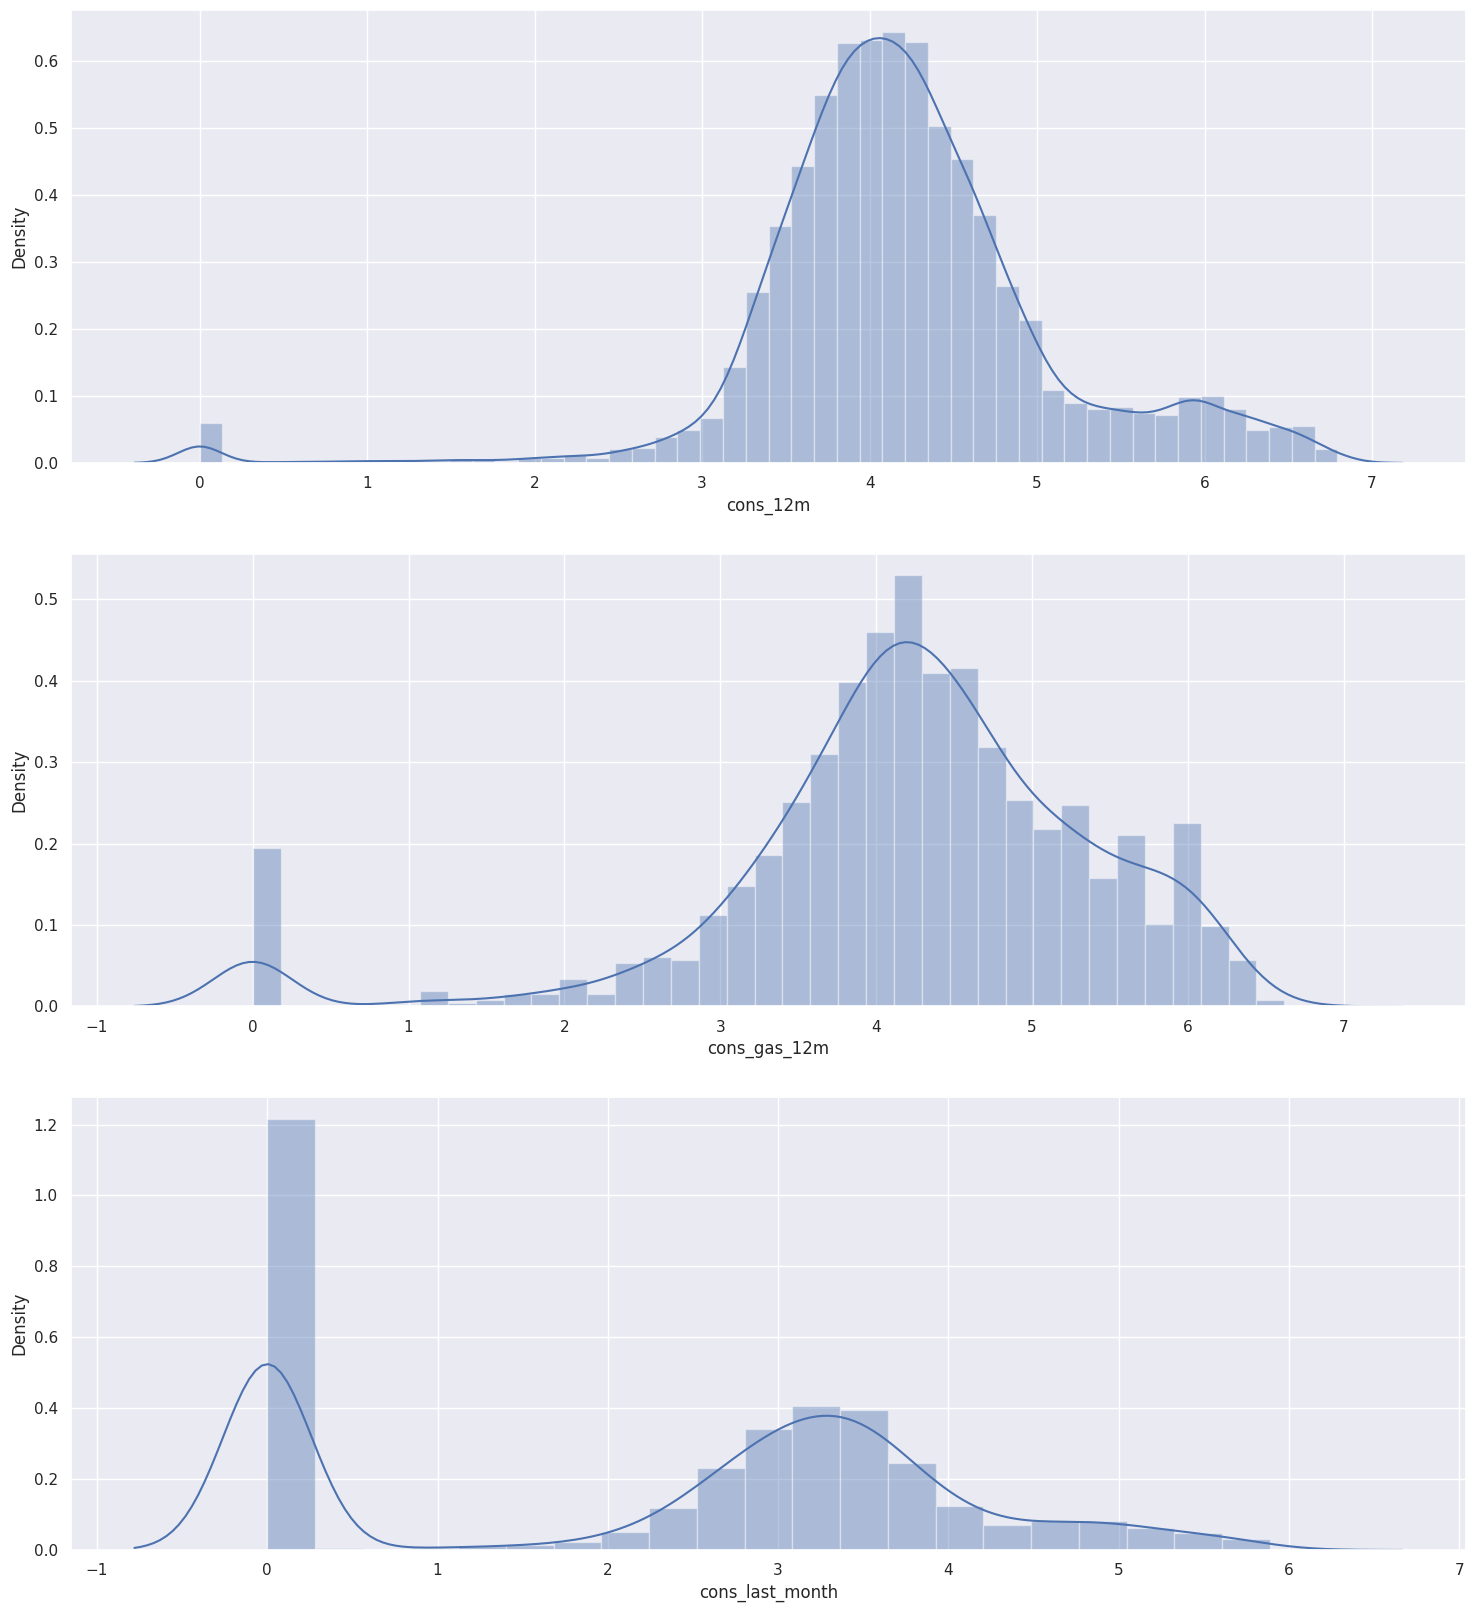

In [25]:
fig, axs = plt.subplots(nrows=3, figsize=(18, 20))
# Plot histograms
sns.distplot((df["cons_12m"].dropna()), ax=axs[0])
sns.distplot((df[df["has_gas"]==1]["cons_gas_12m"].dropna()), ax=axs[1])
sns.distplot((df["cons_last_month"].dropna()), ax=axs[2])
plt.show()

### Correlations

En termes de création de nouvelles fonctionnalités et de transformation de celles existantes, il s'agit essentiellement d'une situation d'essais et d'erreurs qui nécessite une itération. Une fois que nous avons formé un modèle prédictif, nous pouvons voir quelles fonctionnalités fonctionnent et ne fonctionnent pas, nous saurons également à quel point cet ensemble de fonctionnalités est prédictif. Il est toujours utile d'examiner la corrélation de toutes les fonctionnalités dans votre ensemble de données.
Ceci est important car il révèle les relations linéaires entre les entités. Nous voulons que les caractéristiques soient en corrélation avec la variable cible (`churn`), car cela indiquera qu'elles en sont de bons prédicteurs.

Cependant, les fonctionnalités qui ont une corrélation très élevée peuvent parfois être suspectes. En effet, 2 colonnes qui ont une corrélation élevée indiquent qu'elles peuvent partager une grande partie des mêmes informations. L'une des hypothèses de tout modèle prédictif paramétrique (comme indiqué précédemment) est que toutes les caractéristiques doivent être indépendantes.

Pour que les fonctionnalités soient indépendantes, cela signifie que chaque fonctionnalité ne doit absolument pas dépendre d'une autre fonctionnalité. Si deux caractéristiques sont fortement corrélées et partagent des informations similaires, cela casse
cette hypothèse.

Idéalement, vous voulez un ensemble de fonctionnalités qui ont une corrélation de 0 avec toutes les variables indépendantes (toutes les fonctionnalités sauf notre variable cible) et une corrélation élevée avec la variable cible (`churn`).
Cependant, c'est très rarement le cas et il est courant d'avoir un faible degré de corrélation entre des caractéristiques indépendantes.

Voyons maintenant comment toutes les caractéristiques du modèle sont corrélées.

In [26]:
correlation = df.corr()

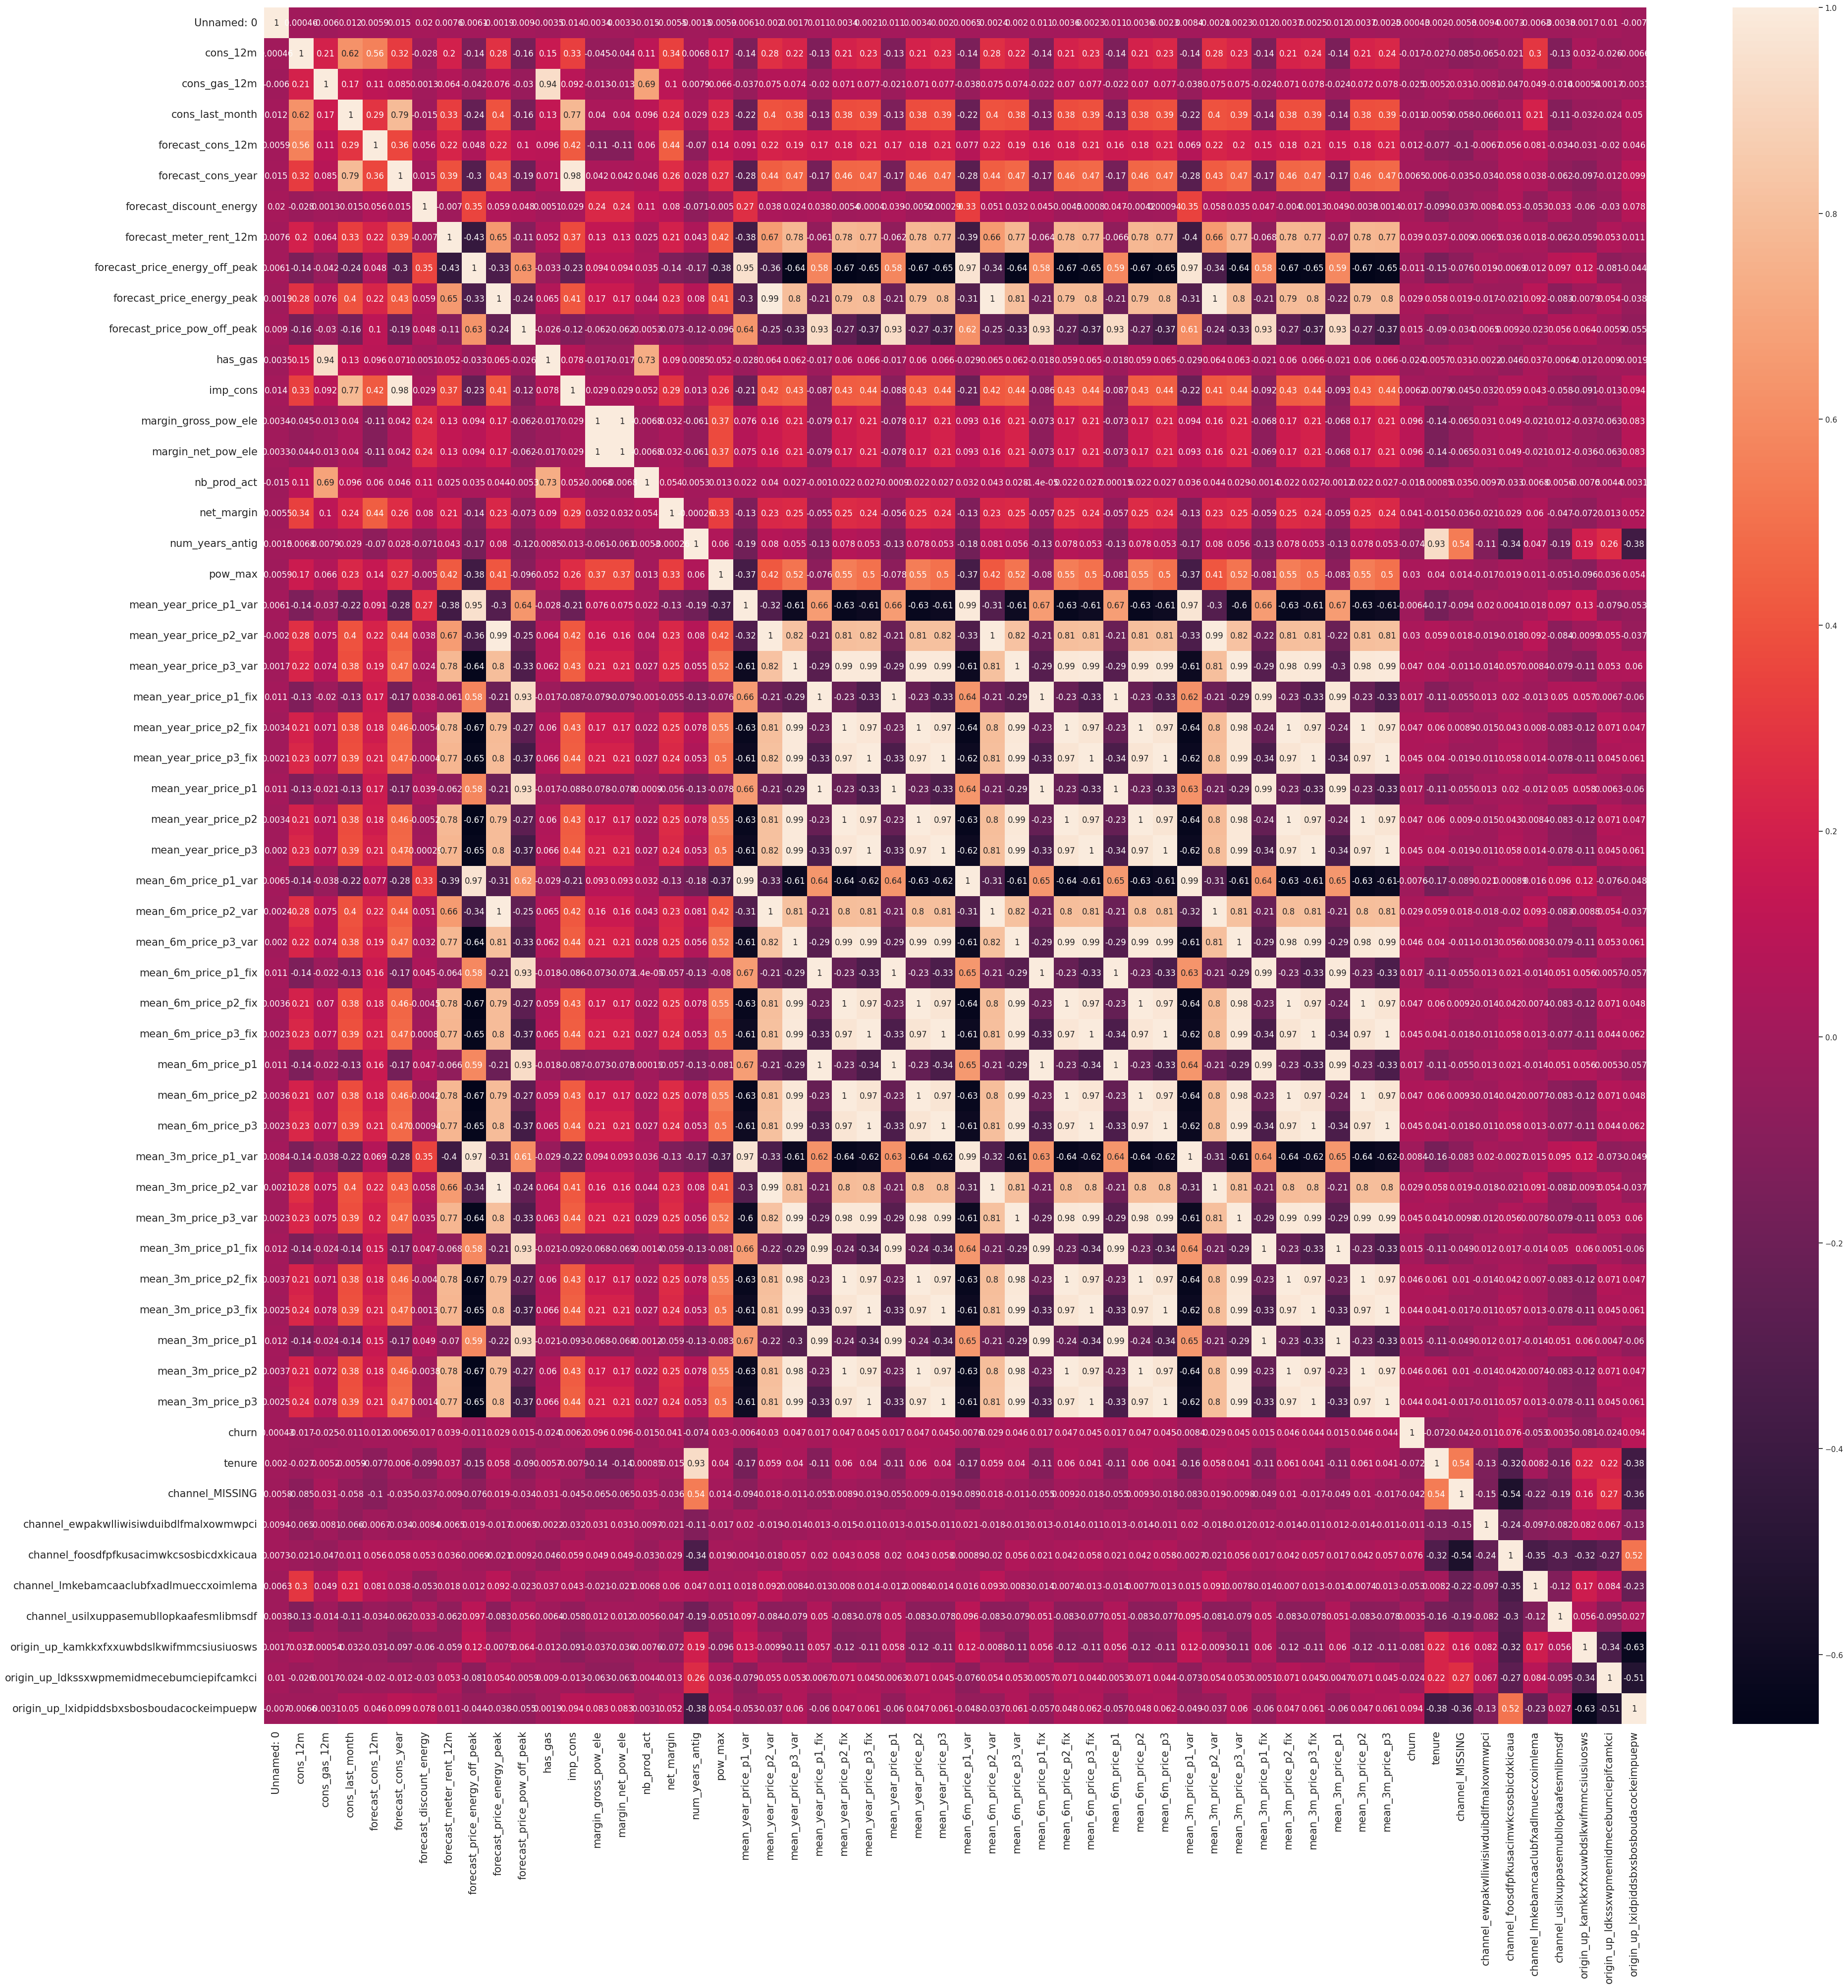

In [27]:
#Plot correlation
plt.figure(figsize=(45, 45))
sns.heatmap(
correlation,
xticklabels=correlation.columns.values,
yticklabels=correlation.columns.values,
annot=True,
annot_kws={'size': 12}
)
#Axis ticks size
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [28]:
# Calculate correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.98)]

# Drop highly correlated features
df = df.drop(to_drop, axis=1)


In [29]:
df = df.drop(columns=['Unnamed: 0'])

In [30]:
df.shape

(14605, 30)

## 5. Modelling
Nous avons maintenant un ensemble de données contenant des fonctionnalités que nous avons conçues et nous sommes prêts à commencer à former un modèle prédictif.

Choisir le classifier à utiliser à partir de pycaret library

In [31]:
from pycaret.classification import *

In [32]:
s = setup(df, target='churn', fix_imbalance= True)

,Description,Value
0,Session id,2902
1,Target,churn
2,Target type,Binary
3,Original data shape,"(14605, 30)"
4,Transformed data shape,"(22842, 30)"
5,Transformed train set shape,"(18460, 30)"
6,Transformed test set shape,"(4382, 30)"
7,Numeric features,28
8,Categorical features,1
9,Preprocess,True


In [33]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9034,0.6964,0.0916,0.5189,0.1554,0.1299,0.1876,1.1170
rf,Random Forest Classifier,0.9031,0.6644,0.0937,0.5107,0.1576,0.1314,0.1871,4.2870
dummy,Dummy Classifier,0.9029,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.3810
xgboost,Extreme Gradient Boosting,0.9009,0.6754,0.1289,0.4831,0.2021,0.1670,0.2104,6.1740
et,Extra Trees Classifier,0.9001,0.6705,0.1087,0.4453,0.1740,0.1413,0.1824,3.7900
gbc,Gradient Boosting Classifier,0.8972,0.6641,0.0413,0.3197,0.0714,0.0491,0.0805,8.3040
ada,Ada Boost Classifier,0.8731,0.6412,0.0846,0.1812,0.1141,0.0556,0.0609,2.3600
dt,Decision Tree Classifier,0.8301,0.5684,0.2436,0.1974,0.2176,0.1237,0.1247,0.7370
knn,K Neighbors Classifier,0.6577,0.5604,0.4069,0.1217,0.1873,0.0445,0.0578,0.5000
svm,SVM - Linear Kernel,0.6541,0.0000,0.3784,0.1624,0.1471,0.0470,0.0579,0.3290


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=2902, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

D'après le résultat nous allons utiliser Light Gradient Boosting Machine.


Light Gradient Boosting Machine (LightGBM) est un cadre d'apprentissage automatique qui utilise des algorithmes d'amplification de gradient pour les tâches d'entraînement et de prédiction. Il est connu pour sa rapidité et son accuracy dans le traitement de données à grande échelle.

### L'entraînement du modèle

In [34]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
import lightgbm as ltb

In [35]:
# Make a copy of our data
train_df = df.copy()

# Separate target variable from independent variables
y = df['churn']
X = df.drop(columns=['id', 'churn'])
print(X.shape)
print(y.shape)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(14605, 28)
(14605,)
(10953, 28)
(10953,)
(3652, 28)
(3652,)


In [36]:
lgbm=ltb.LGBMClassifier(random_state=42)
lgbm.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

### Evaluation

Nous allons utiliser 3 métriques pour évaluer les performances :

- Accuracy = le rapport des observations correctement prédites au total des observations
- Precision = la capacité du classifieur à ne pas étiqueter un échantillon négatif comme positif
- Recall = la capacité du classifieur à retrouver tous les échantillons positifs

In [37]:
prediction = lgbm.predict(X_test)
TN, FP, FN, TP = metrics.confusion_matrix(y_test, prediction).ravel()

In [38]:
print(f"True positives: {TP}")
print(f"False positives: {FP}")
print(f"True negatives: {TN}")
print(f"False negatives: {FN}\n")
print(f"Accuracy: {metrics.accuracy_score(y_test, prediction)}")
print(f"Precision: {metrics.precision_score(y_test, prediction)}")
print(f"Recall: {metrics.recall_score(y_test, prediction)}")

True positives: 24
False positives: 5
True negatives: 3274
False negatives: 349

Accuracy: 0.9030668127053669
Precision: 0.8275862068965517
Recall: 0.064343163538874


In [39]:
y_test.value_counts()

0    3279
1     373
Name: churn, dtype: int64

D'après les résultats :

- Dans l'ensemble de test, environ 10 % des lignes sont des churners (churn = 1).
- En regardant les vrais négatifs (TN), nous avons 3274 sur 3279. Cela signifie que sur tous les cas négatifs (churn = 0), nous avons prédit 3274 comme négatifs (d'où le nom Vrai négatif).

- En regardant les faux négatifs (FN), c'est là que nous avons prédit qu'un client ne se désabonnerait pas (churn = 0) alors qu'en fait, il s'est désabonné (churn = 1). Ce nombre est assez élevé à 349, nous voulons que les faux négatifs soient aussi proches que possible de 0.

- En ce qui concerne les faux positifs (FP), c'est là que nous avons prédit qu'un client se désabonnerait alors qu'il ne le serait pas. Pour cette valeur on peut voir qu'il y a 5 cas, ce qui est bien!

- Avec les vrais positifs (TP), nous pouvons voir qu'au total, nous avons 373 clients qui se sont inscrits dans l'ensemble de données de test. Cependant, nous ne pouvons identifier correctement que 24 de ces 373, ce qui est très faible.

- Par conséquent, l'utilisation de la précision et du rappel est importante.

- En regardant le score de précision, cela nous montre un score de 0,82 qui n'est pas mauvais, mais qui pourrait être amélioré.

- Cependant, le recall nous montre que le classifieur a une très faible capacité à identifier les échantillons positifs. Ce serait la principale préoccupation pour améliorer ce modèle !

Donc, dans l'ensemble, nous sommes en mesure d'identifier très précisément les clients qui n'abandonnent pas, mais nous ne sommes pas en mesure de prédire les cas où les clients abandonnent ! Ce que nous constatons, c'est qu'un pourcentage élevé de clients sont identifiés comme n'étant pas désabonnés alors qu'ils devraient l'être. Cela me dit à son tour que l'ensemble actuel de fonctionnalités n'est pas suffisamment discriminant pour distinguer clairement entre les churners et les non-churners.


In [40]:
feature_importances = pd.DataFrame({
'features': X_train.columns,
'importance': lgbm.feature_importances_
}).sort_values(by='importance', ascending=True).reset_index()

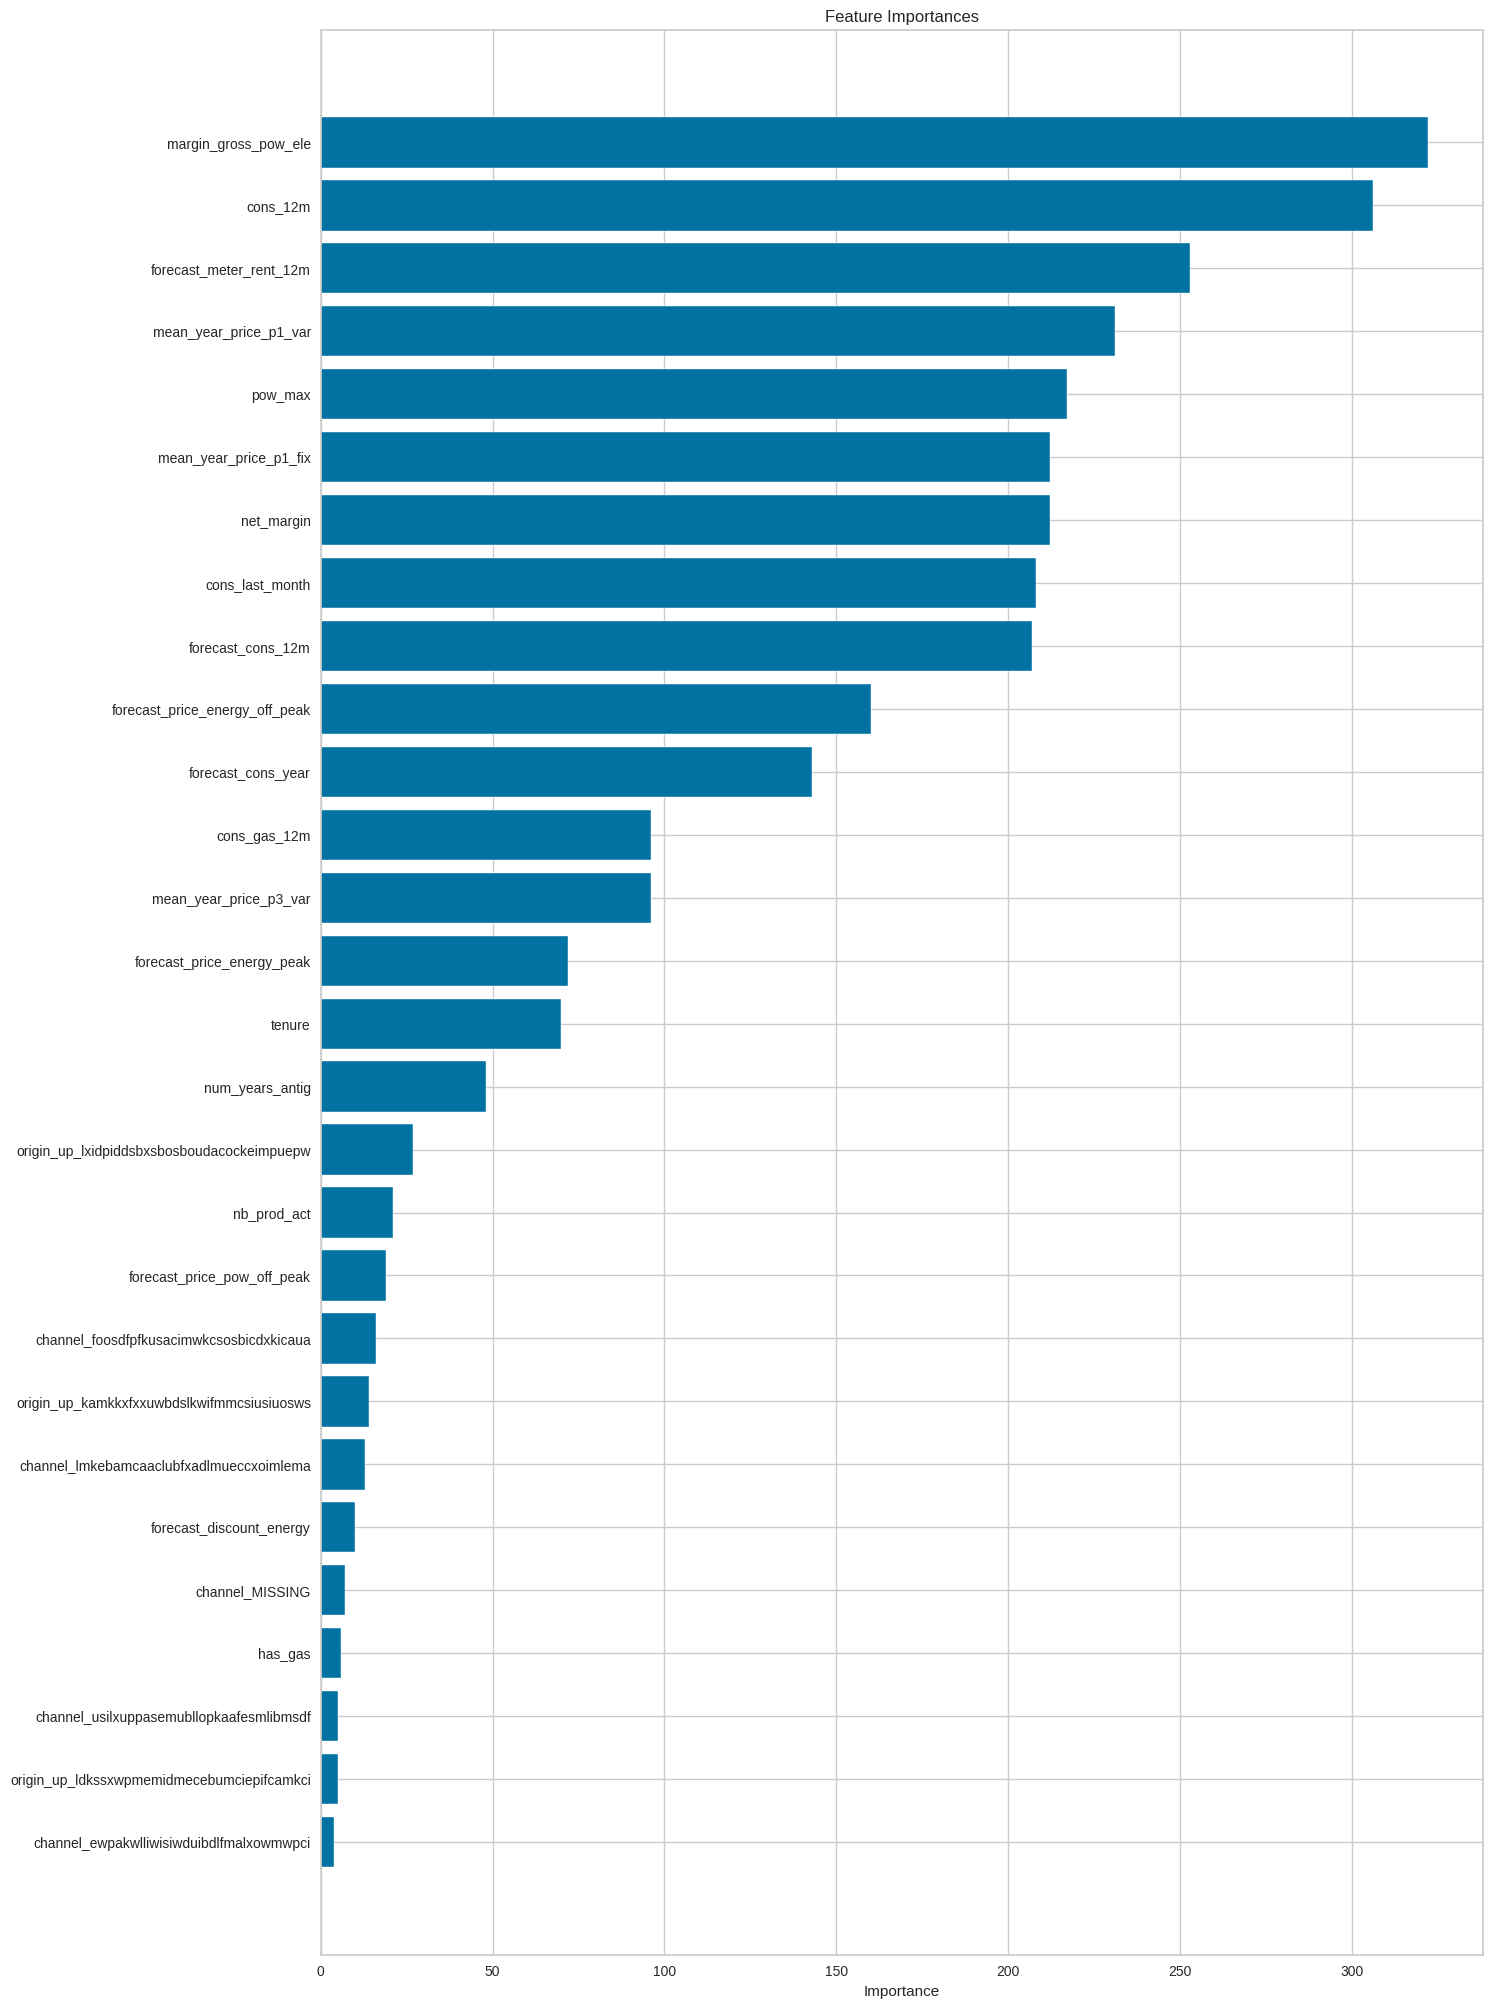

In [41]:
plt.figure(figsize=(15, 25))
plt.title('Feature Importances')
plt.barh(range(len(feature_importances)), feature_importances['importance'],color='b', align='center')
plt.yticks(range(len(feature_importances)), feature_importances['features'])
plt.xlabel('Importance')
plt.show()

A partir de ce graphique, nous pouvons observer les points suivants :

- `margin_gross_pow_ele` et `cons_12m` sont les principaux facteurs de désabonnement dans ce modèle
- `pow_max` est également un facteur influent
- `tenure` se situe dans la moitié supérieure en termes d'influence et certaines des fonctionnalités construites à l'arrière de celle-ci la surpassent en fait

### Mettre en place un score de probabilité de churn

In [42]:
proba_predictions = lgbm.predict_proba(X_test)
probabilities = proba_predictions[:, 1]
probabilities

array([0.8023227 , 0.01088503, 0.0250937 , ..., 0.01507869, 0.04236828,
       0.14394438])

In [43]:
threshold = 0.5
churn_prediction = (probabilities > threshold).astype(int)
churn_prediction
prob_churn_scores = probabilities.tolist()


### **Save model**

In [44]:
import pickle
pickle.dump(lgbm, open('lgbm.pkl', 'wb'))
pickled_model = pickle.load(open('lgbm.pkl', 'rb'))
pickled_model.predict(X_test)

array([1, 0, 0, ..., 0, 0, 0])

## 6. Model Deployement

In [46]:
#!pip install streamlit
import streamlit as st
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

import pickle


app_mode = st.sidebar.selectbox('Select Page',['Home','Predict_Churn'])

if app_mode=='Home':
    st.title('Client Prediction')
    st.markdown('Dataset :')
    df=pd.read_csv('clean_data_after_eda1.csv')
    st.write(df.head())


elif app_mode == 'Predict_Churn':

    st.subheader('Fill in client details to get prediction ')
    margin_gross_pow_ele = st.number_input("marge brute sur souscription d'électricité")
    cons_12m = st.number_input("consommation d'électricité des 12 derniers mois")
    forcast_meter_rent_12m = st.number_input("facture de location prévisionnelle pour les 2 prochains mois")
    pow_max = st.number_input("puissance souscrite")
    net_margin = st.number_input("marge nette totale")
    tenure = st.number_input("tenure")




    subdata={
        'margin_gross_pow_ele':margin_gross_pow_ele,
        'cons_12m ':cons_12m ,
        'forcast_meter_rent_12m':   forcast_meter_rent_12m,
        'pow_max':pow_max,
        'net_margin':net_margin,
        'tenure':tenure,
        }

    features = [margin_gross_pow_ele, cons_12m, forcast_meter_rent_12m,pow_max,net_margin,tenure]

    results = np.array(features).reshape(1, -1)

    if st.button("Predict"):

        picklefile = open("lgbm.pkl", "rb")
        model = pickle.load(picklefile)

        prediction = model.predict(results)
        if prediction[0] == 0:
            st.success('Client will not churn')
        elif prediction[0] == 1:
            st.error( 'Client will churn')
